# **Movie Rating Prediction With Python**
bollywood-story_647_080415020120.avif

Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform.

We will going to do some exploratory data analysis to answer the below questions.

* Year with best rating
* Does length of movie have any impact with the rating?
* Top 10 movies according to rating per year and overall.
* Which director directed the most movies
* Which actor starred in the most movies

After that, we'll build the predictive machine learning model using **Stochastic Gradient Descent (SGD) Regressor** which is going to predicts the rating of a movie based on the given parameters.

### **1) Importing Required Python Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### **2) Load and Clean The Movies Dataset**

In [2]:
# Load the data from csv file to Pandas DataFrame
movies_data = pd.read_csv('/content/drive/MyDrive/ML,DS_Project_Datasets/Movies_Prediction/IMDb Movies India.csv',encoding='latin-1')

In [3]:
# Get the first five rows of the dataset
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
# Get more information about dataset
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
# Check the number of missing values in the dataset
movies_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

From above, we see that the dataset is missing a lot of information. There is no other source to fill this missing values, hence I will drop the missing values data rows before proceed for the model building.

In [6]:
# droping the missing value rows
movies_data.dropna(inplace=True)
movies_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [7]:
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Some more data cleaning work needs to be done on the remaning data.

In the **Year** column, we'll remove the brackets & change it's data type to integers.

In the **Duration** column, we'll only keep the numbers & convert the data type to integers.

In [8]:
# More data cleaning steps
movies_data['Year']= movies_data['Year'].str.replace('(',"",regex=True)
movies_data['Year']= movies_data['Year'].str.replace(')',"",regex=True)
movies_data['Duration']= movies_data['Duration'].str.replace(' min',"",regex=True)
movies_data['Votes']= movies_data['Votes'].str.replace(',',"",regex=True)
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
#Change the data type
movies_data['Year'] = movies_data['Year'].astype(str).astype(int)
movies_data['Duration'] = movies_data['Duration'].astype(str).astype(int)
movies_data['Votes'] = movies_data['Votes'].astype(str).astype(int)
movies_data.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Data preprocessing has been completed & now we can proceed for exploratory data analysis to get overview about the data.

### **3) Exploratory Data Analysis**

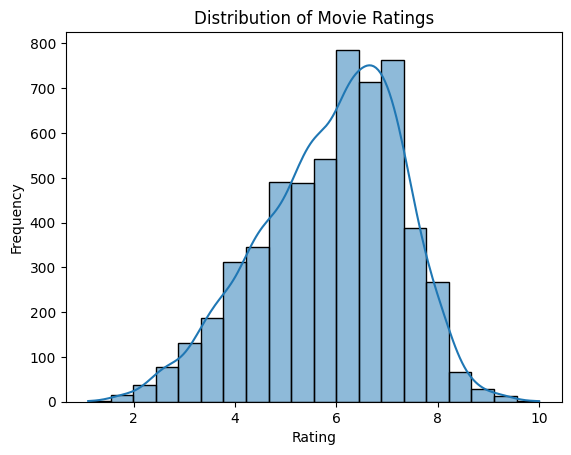

In [10]:
# Get the distribution of rating
ax = sns.histplot(data = movies_data, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()

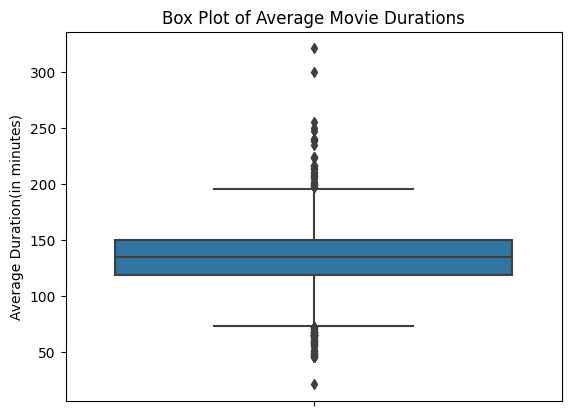

In [11]:
# Average movie duration
ax = sns.boxplot(data=movies_data, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

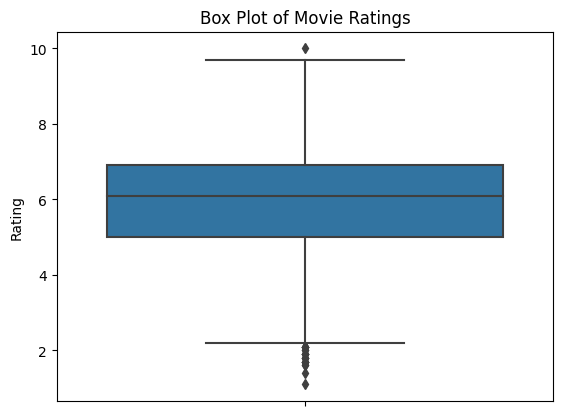

In [12]:
# Average movie rating
ax = sns.boxplot(data=movies_data, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')
plt.show()

<Axes: xlabel='Duration', ylabel='Rating'>

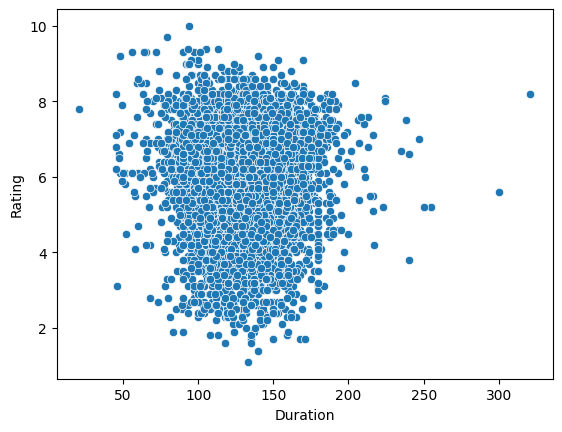

In [13]:
# Duration Vs Rating
sns.scatterplot(x=movies_data['Duration'], y=movies_data['Rating'], data=movies_data)

In [16]:
# Groupby Yearwise movies count and avg. rating
yearly_stats = movies_data.groupby('Year').agg({'Name': 'count', 'Rating': 'mean'})

# Rename the column names
yearly_stats.columns = ['Movie Count', 'Mean Rating']

# Reset the index to make "Year" a regular column
yearly_stats = yearly_stats.reset_index()

yearly_stats.head()

,Year,Movie Count,Mean Rating
0,1931,2,5.75
1,1932,1,6.00
2,1933,1,6.20
3,1934,2,5.60
4,1935,5,5.70


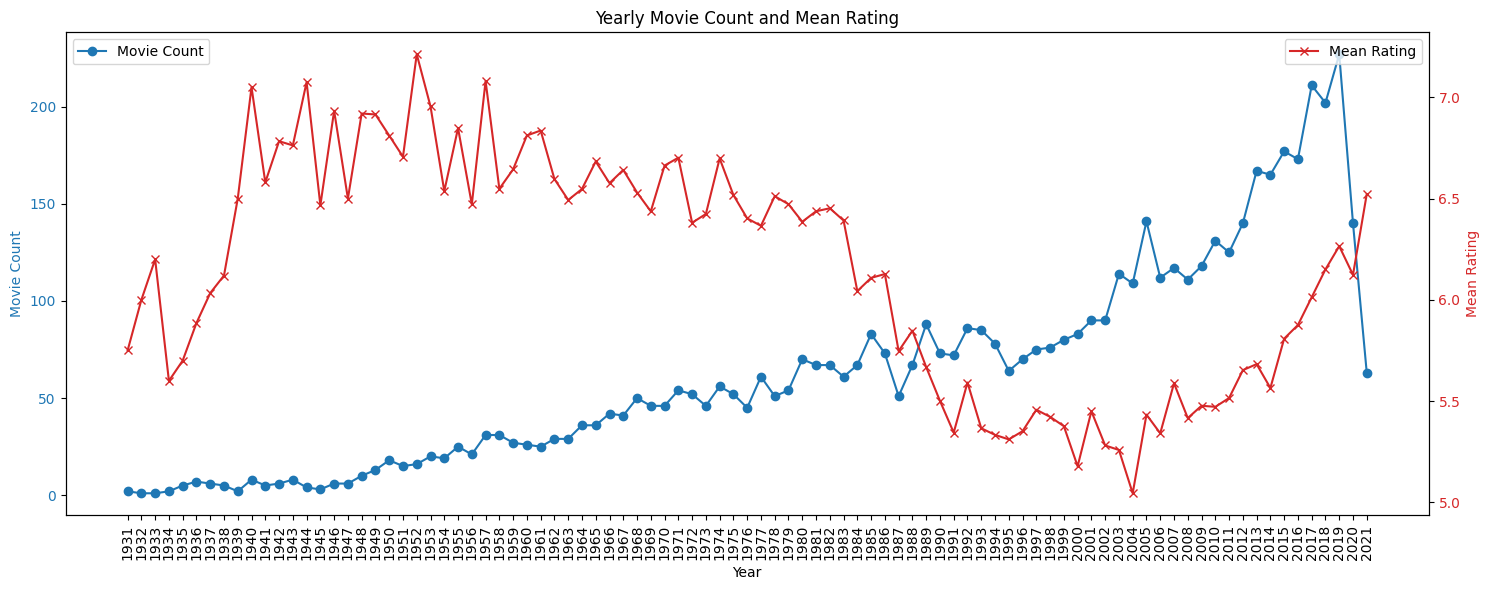

In [17]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot Movie Count data
ax1.set_xlabel('Year')
ax1.set_ylabel('Movie Count', color='tab:blue')
ax1.plot(yearly_stats['Year'], yearly_stats['Movie Count'], color='tab:blue', marker='o', label='Movie Count')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for Mean Rating
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Rating', color='tab:red')
ax2.plot(yearly_stats['Year'], yearly_stats['Mean Rating'], color='tab:red', marker='x', label='Mean Rating')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add labels and legend
ax1.set_title('Yearly Movie Count and Mean Rating')
ax1.set_xticks(yearly_stats['Year'])
ax1.set_xticklabels(yearly_stats['Year'], rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
# Find the year with the maximum mean rating
max_rating_year = yearly_stats['Year'][yearly_stats['Mean Rating'].idxmax()]
max_rating = yearly_stats['Mean Rating'].max()

print('The Year ',max_rating_year,'has the best rating which is ',max_rating)

The Year  1952 has the best rating which is  7.2125


**The movies which are released in the year 1952 get the best avg. rating which is 7.21.**

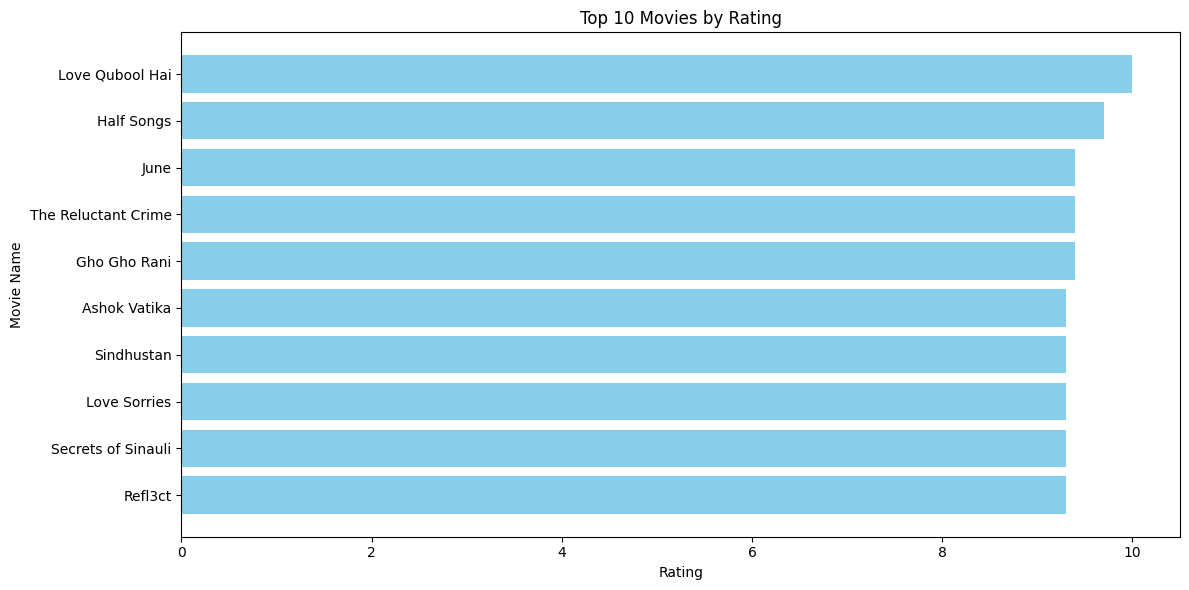

In [19]:
top_10_movies = movies_data.sort_values(by='Rating', ascending=False).head(10)

# Create a bar plot for the top 10 movies
plt.figure(figsize=(12, 6))
plt.barh(top_10_movies['Name'], top_10_movies['Rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.title('Top 10 Movies by Rating')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rating at the top

# Show the plot
plt.tight_layout()
plt.show()

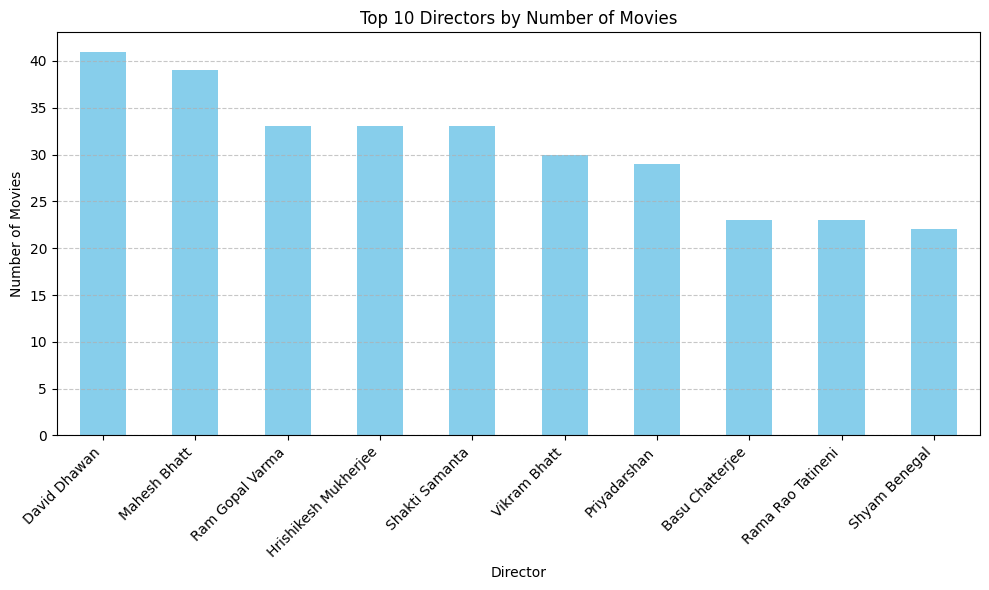

In [20]:
# Count the number of movies directed by each director
director_counts = movies_data['Director'].value_counts().head(10)

# Create a bar plot for the top 10 directors
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 10 Directors by Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

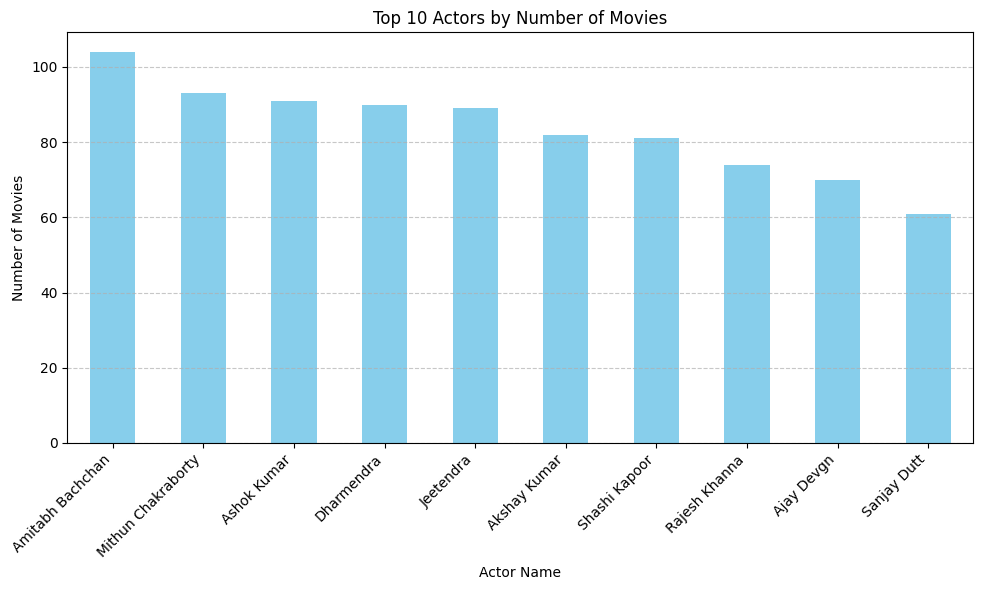

In [21]:
# Count the number of movies each Actor 1 has acted in
actor1_counts = movies_data['Actor 1'].value_counts().head(10)

# Create a bar plot for the top 10 Actor 1 names
plt.figure(figsize=(10, 6))
actor1_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Actor Name')
plt.ylabel('Number of Movies')
plt.title('Top 10 Actors by Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### **4) Building Machine Learning Model**

In [22]:
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [23]:
# Drop the not required columns
movies_data.drop(['Name','Genre','Director','Actor 1','Actor 2','Actor 3'],axis=1,inplace=True)
movies_data.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [24]:
# Select relevant features that might influence the movie ratings
X = movies_data[['Year','Duration','Votes']]
Y = movies_data['Rating']

In [25]:
# Split the data into train & test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=100)

In [26]:
# Create a pipeline with standard scaling and SGD regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=10000, random_state=1000))
])

In [27]:
# Train the model
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

In [28]:
Y_pred_pipeline = pipeline.predict(X_test)

In [29]:
# Evaluation Metrics for the Pipeline
mae_pipeline = mean_absolute_error(Y_test, Y_pred_pipeline)
mse_pipeline = mean_squared_error(Y_test, Y_pred_pipeline)
r2_pipeline = r2_score(Y_test, Y_pred_pipeline)

In [30]:
print("Pipeline Mean Absolute Error:", mae_pipeline)
print("Pipeline Mean Squared Error:", mse_pipeline)
print("Pipeline R-squared:", r2_pipeline)

Pipeline Mean Absolute Error: 1.0478740431951175
Pipeline Mean Squared Error: 1.7297329156750294
Pipeline R-squared: 0.07752218880739259


### *Model Deployment to get the predicted movies rating on the test data*

In [31]:
new_input = pd.DataFrame({
    'Year':[2023],
    'Duration':[120],
    'Votes':[10000]
    })

In [32]:
predicted_rating = pipeline.predict(new_input)

print("Predicted Rating:", predicted_rating)

Predicted Rating: [5.55427893]
